<a href="https://colab.research.google.com/github/arjelmilan/Customer-Behaviour-Analysis/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv('/content/E-commerce Customer Behavior - Sheet1.csv')
df.head()

,Customer ID,Gender,Age,City,Membership Type,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase,Satisfaction Level
0,101,Female,29,New York,Gold,1120.20,14,4.6,True,25,Satisfied
1,102,Male,34,Los Angeles,Silver,780.50,11,4.1,False,18,Neutral
2,103,Female,43,Chicago,Bronze,510.75,9,3.4,True,42,Unsatisfied
3,104,Male,30,San Francisco,Gold,1480.30,19,4.7,False,12,Satisfied
4,105,Male,27,Miami,Silver,720.40,13,4.0,True,55,Unsatisfied


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer ID               350 non-null    int64  
 1   Gender                    350 non-null    object 
 2   Age                       350 non-null    int64  
 3   City                      350 non-null    object 
 4   Membership Type           350 non-null    object 
 5   Total Spend               350 non-null    float64
 6   Items Purchased           350 non-null    int64  
 7   Average Rating            350 non-null    float64
 8   Discount Applied          350 non-null    bool   
 9   Days Since Last Purchase  350 non-null    int64  
 10  Satisfaction Level        348 non-null    object 
dtypes: bool(1), float64(2), int64(4), object(4)
memory usage: 27.8+ KB


In [5]:
df.describe()

,Customer ID,Age,Total Spend,Items Purchased,Average Rating,Days Since Last Purchase
count,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000
mean,275.500000,33.597143,845.381714,12.600000,4.019143,26.588571
std,101.180532,4.870882,362.058695,4.155984,0.580539,13.440813
min,101.000000,26.000000,410.800000,7.000000,3.000000,9.000000
25%,188.250000,30.000000,502.000000,9.000000,3.500000,15.000000
50%,275.500000,32.500000,775.200000,12.000000,4.100000,23.000000
75%,362.750000,37.000000,1160.600000,15.000000,4.500000,38.000000
max,450.000000,43.000000,1520.100000,21.000000,4.900000,63.000000


In [6]:
df.describe(include=object)

,Gender,City,Membership Type,Satisfaction Level
count,350,350,350,348
unique,2,6,3,3
top,Female,New York,Gold,Satisfied
freq,175,59,117,125


In [16]:
df.isnull().sum()

Customer ID                 0
Gender                      0
Age                         0
City                        0
Membership Type             0
Total Spend                 0
Items Purchased             0
Average Rating              0
Discount Applied            0
Days Since Last Purchase    0
Satisfaction Level          2
dtype: int64

In [17]:
df.dropna(inplace=True)

In [20]:
df.duplicated().sum()

0

In [25]:
df_gender=df['Gender'].value_counts().reset_index()
df_gender.columns=['Gender','Count']
df_gender

,Gender,Count
0,Male,175
1,Female,173


([<matplotlib.patches.Wedge at 0x7c0f305fea70>,
 [Text(-0.00993010623072655, 1.0999551777187317, 'Male'),
  Text(0.009930003245489732, -1.0999551786484505, 'Female')],
 [Text(-0.005416421580396299, 0.5999755514829446, '50.29%'),
  Text(0.005416365406630763, -0.5999755519900639, '49.71%')])

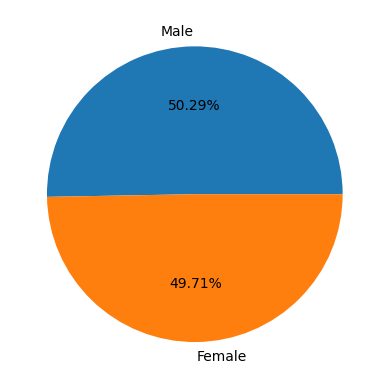

In [31]:
plt.pie(df_gender['Count'],autopct='%1.2f%%',labels=df_gender['Gender'])

<Axes: xlabel='Gender'>

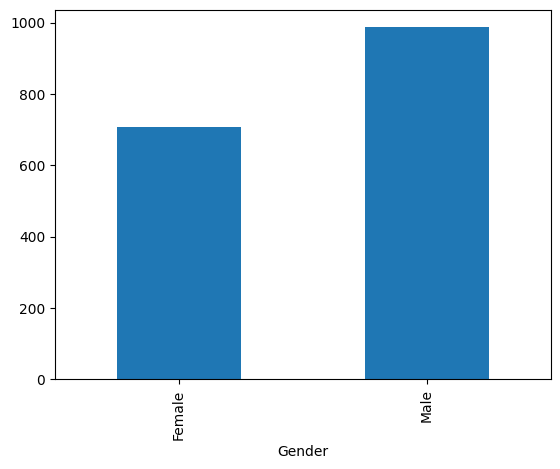

In [41]:
df.groupby('Gender')['Total Spend'].mean().plot.bar()

In [61]:
gender_membership=df[['Gender','Membership Type']].value_counts().reset_index()
gender_membership

,Gender,Membership Type,0
0,Male,Silver,116
1,Female,Bronze,114
2,Male,Gold,59
3,Female,Gold,58
4,Female,Silver,1


<Axes: xlabel='Gender', ylabel='0'>

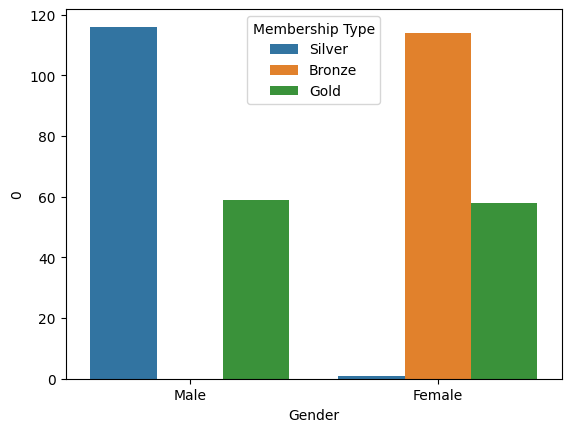

In [62]:
sns.barplot(data=gender_membership,x='Gender',y=0,hue='Membership Type')

<Axes: xlabel='Gender', ylabel='count'>

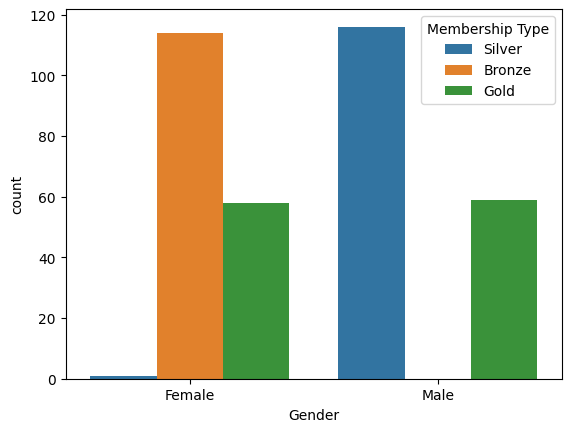

In [66]:
sns.countplot(df,x='Gender',hue='Membership Type',hue_order=['Silver','Bronze','Gold'])

<Axes: xlabel='Age', ylabel='count'>

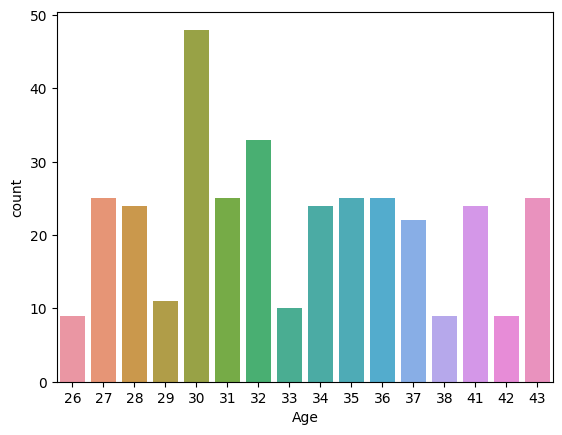

In [71]:
sns.countplot(df,x=df['Age'])